# DSCI 235 Final Project - Winter Olympics / GDP
### By: Ethan Powers & Nathan Mitchell
##### Data Used:
First Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv             
Second Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/gdp-per-capita-maddison-2020.csv
---
##### Description:
    For this project, we have decided to analyze data concerning the Winter Olympics since its induction in 1924 up until 2014. The only years in which the Olympic Games did not take place were 1940 and 1944 due to World War II. To guide this project, we have come up with an overlying hypothesis: countries that are known for different winter sports compete well in those categories in the Winter Olympics.

    For example, countries like Canada are known for their ice hockey while Russia is known for their figure skating. What we wish to examine with our data is to see  if they rank best for most overall medals and most Gold medals in this category. We also want to see how long they have been ranking this well, given we find that they are. On top of this, we also wish to know which countries rank for sports that aren’t as well known. Curling, for example, is an event at the Winter Olympics, but no immediate country comes to mind as to who may rank best in this event.

    We are also interested in seeing which countries have won the most total medals (Bronze, Silver, and Gold) and, more specifically, which have won the most Gold medals between the Winter Olympics in 1924 and 2014. For this, we will make a histogram for the top 10 countries in both 1924 and 2014 according to the total number of medals they have won. Some of these countries may not have won any medals back in 1924 because they didn’t exist yet, but we will indicate that in the analysis. Due to this fact, we will need to deal with NaN values in our analysis.

    Another hypothesis that we wish to examine is to see if countries with higher average GDPs perform better in the Winter Olympics. To analyze this question, we will need to pull in data on GDP and compare the data between 1924 to 2018 to see if we can find any truth behind this statement. For this, we plan to make a line graph of GDP per year in the ten countries that have the highest GDPs and compare this to how many medals that country has won every year. To do this, we will only be considering countries that participate in the Winter Olympics.
 ---
 ##### Loading In The Data:

In [5]:
import pandas as pd
winter = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv')

gdp = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/gdp-per-capita-maddison-2020.csv').dropna(axis=1)

 ##### Creating a Multi-Index:

In [6]:
#Note: should only be run once
idx = pd.IndexSlice

gdp.rename(columns = {'Entity':'Country'}, inplace = True)
gdp = gdp.sort_values(by = ['Country', 'Year'], ascending=True)
gdp = gdp.loc[(gdp['Year'] >= 1924) & (gdp['Year'] <= 2018)]
gdp = gdp = gdp.reset_index()
gdp = gdp.loc[:, ['Country', 'Year', 'GDP per capita']]
gdp = gdp.set_index(['Country', 'Year'])


winter = winter.sort_values(by = ['Country', 'Year', 'Sport'], ascending = True)
winter['Medal Rank'] = winter['Medal Rank'].apply(lambda x: 1)
winter = winter.set_index(['Country', 'Sport', 'Year', 'Medal'])
winter = winter.rename(columns = {'Medal Rank':'Medal Count'})

##### Preliminary Analysis or whatever change this later:

In [7]:
#THIS IS HOW TO GET TOTAL MEDALS / MEDAL PER TYPE
tot_med = winter.groupby(['Country', 'Medal']).aggregate('sum')

#MOST TOTAL MEDALS
#tot_med.groupby(['Country']).sum().sort_values(by = 'Medal Count', ascending = False)

#MOST GOLD MEDALS
#Gold = tot_med.loc[idx[:, 'gold', :]].sort_values(by = 'Medal Count', ascending = False)

#MOST SILVER MEDALS
#Silver = tot_med.loc[idx[:, 'silver', :]].sort_values(by = 'Medal Count', ascending = False)

#MOST BRONZE MEDALS
#Bronze = tot_med.loc[idx[:, 'bronze', :]].sort_values(by = 'Medal Count', ascending = False)

##### Plotting Medals Won Over Time - Norway

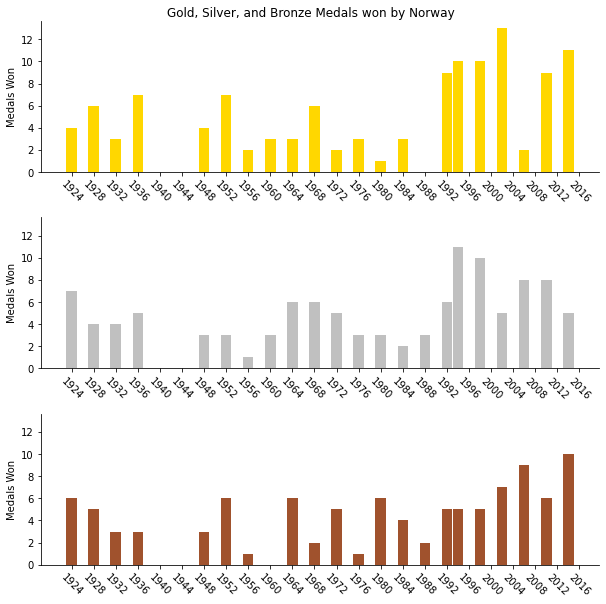

In [11]:
%matplotlib inline
import matplotlib.pylab as plt

fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.set
plt.suptitle('Gold, Silver, and Bronze Medals won by Norway', y=.9)
#plt.ylabel('Medals Won')

medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

Norway_one_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1924:1940].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_two_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1948:1984].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_three_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1988:1994].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_four_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1994:2014].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']

x1 = range(1924, 1940, 4)
x2 = range(1948, 1985, 4)
x3 = range(1992, 1995, 2)
x4 = range(1994, 2015, 4)

axs[0].bar(x1, Norway_one_gold, color = 'gold', width = 1.9)
axs[0].bar(x2, Norway_two_gold, color = 'gold', width = 1.9)
axs[0].bar(x3, Norway_three_gold, color = 'gold', width = 1.9)
axs[0].bar(x4, Norway_four_gold, color = 'gold', width = 1.9)
plt.sca(axs[0])
plt.ylabel('Medals Won')
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)



medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

Norway_one_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1924:1940].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_two_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1948:1992].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_three_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1994:2014].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']

x5 = range(1948, 1995, 4)

axs[1].bar(x1, Norway_one_silver, color = 'silver', width = 1.9)
axs[1].bar(x5, Norway_two_silver, color = 'silver', width = 1.9)
axs[1].bar(x4, Norway_three_silver, color = 'silver', width = 1.9)
plt.sca(axs[1])
plt.ylabel('Medals Won')
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)


medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

Norway_one_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1924:1940].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_two_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1948:1956].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_three_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1964:1992].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']
Norway_four_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1994:2014].reset_index().drop(columns='Medal', axis=1).set_index(['Year'])['Medal Count']

x6 = range(1948, 1957, 4)
x7 = range(1964, 1995, 4)
x8 = range(1994, 2015, 4)

axs[2].bar(x1, Norway_one_bronze, color = 'sienna', width = 1.9)
axs[2].bar(x6, Norway_two_bronze, color = 'sienna', width = 1.9)
axs[2].bar(x7, Norway_three_bronze, color = 'sienna', width = 1.9)
axs[2].bar(x8, Norway_four_bronze, color = 'sienna', width = 1.9)
plt.sca(axs[2])
plt.ylabel('Medals Won')
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)


plt.subplots_adjust(hspace = .3)

    One of the first things we noticed from creating this plot was that the years did not line up properly. The first Winter Olympics was held in 1924. If held every four years, there should have been games in 2016 and 2020. This, however, is   not the case. What we learned is that in the 1990s the games were changed to happen in-between when the Summer Olympics, so the Winter Olympics were held in 1992 and the again two years later in 1994. Visually, this can be seen by looking at the numbers of medals won 1994 and beyond. Instead of occuring on a tick, they appear between ticks.
    
    We noticed two things of interest here. First, as stated before, there is a break in medals won from the 1944 and 1948  Winter Olympics becaues of WWII. The second thing of interest is that Norway did not win any Gold medals in any category in the 1988 Winter Olympics. They also did not win any Bronze medals in 1960.
   

In [ ]:
#ADD IN SOMETHING THAT CHECKS THE SUM OF EVENTS EACH YEAR. THIS MAY EXPLAIN THE INCREASE IN MEDALS WON